# PROBLEMA DO CAMINHO CRÍTICO

O Problema do Caminho Crítico é bastante lidado em gerenciamento de projetos, cujo objetivo é encontrar qual o conjunto de atividades dentro de um projeto que não podem ser postergadas (isto é, que não podem ser atrasadas) sem acarretar no atraso de todo o projeto em si. E o conjunto dessas atividades é chamado de Caminho Crítico do projeto. Muitas vezes é útil saber quais tarefas de um projeto fazem parte do Caminho Crítico com o intuito de saber quais as atividades que determinam o tempo do projeto e tentar investir esforços para reduzir o seu tempo de duração.

Além disso, é muitas vezes útil saber quais atividades que NÃO fazem parte do Caminho Crítico, e também o tempo de folga de cada uma delas, uma vez que o atraso de qulaquer uma delas não atrasam o projeto, desde que o tempo atraso não seja maior que o respectivo tempo de folga, havendo possibilidade de diminuir a prioridade de execução de alguma dessas atividades em situações adversas. Como consequência direta da definição do Caminho Crítico, as atividades que pertecem a ele possuem folga de tempo igual a 0, uma vez que qualquer acréscimo de tempo de execução de qualquer uma delas atrasará o projeto todo.

Para a resolução do Problema do Caminho Crítico, busca-se encontrar em um grafo com $n$ atividades de projeto qual o caminho com o maior tempo de duração entre o vértice origem $0$, (que representa o início do projeto) e o vértice destino $n+1$ (que será o fim do projeto). As atividades serão representadas como vértices no grafo e cada uma das arestas possuem um peso $d_{i}$ que corresponde à duração média da atividade $i$.

A modelagem deste problema pode ser feito em Programação Linear da seguinte forma:

$$
\text{Min } z = x_{n+1} - x_{0} \\
$$

$$
\begin{array}{rlll}
  \text{Sujeito a: } & & & \\
  & \sum_{j=1}^{n} x_{j} \ge (x_{i} + d_{i}) \cdot a_{ij} & , \forall \ i,j=0,...,n+1  & (1) \\
  & x_{i} \ge 0 & , \forall \ i=0,...,n+1 & (2)
\end{array}
$$

Onde:

- $x_{i}$ indica o tempo em que a atividade $i$ irá começar, em que $x_0$ correpsonde ao tempo em que o projeto irá ser iniciado e $x_{n+1}$ ao término do projeto; 
- $d_{i}$ é a duração da atividade $i$;
- $a_{ij}$ é um parâmetro que nos diz se a atividade $i$ é antecessora imediata da atividade $j$. Se for, $a_{ij}=1$, e caso contrário, $a_{ij}=0$;
- O conjunto $(1)$ de restrições pode ser traduzida como: "_Caso a atividade $i$ anteceda a atividade $j$, o tempo $x_{j}$ de iniciar a atividade $j$ deve ser maior que o tempo $x_{i}$ de iniciar a atividade $i$ mais a sua duração $d_{i}$_";
- O conjunto $(2)$ de restrições garantem a não negatividade dos tempos $x_{i}$.

# Instância do Problema

> A figura abaixo apresenta um diagrama de redes de um certo projeto, com 11 atividades rotuladas de "A" a "K", com as suas respectivas durações para serem executadas (em dias). Deseja-se descobrir quais destas atividades fazem parte do Caminho Crítico deste projeto. Mais dois vértices foram adicionados, o "Início" e o "Fim", apenas com o intuito de completar o diagrama, e ambos possuem tempo de duração de 0 dias.

<center>

![exemplo_caminho_critico.png](https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Operations-Research/assets/exemplo_caminho_critico.png)

Fonte: [Cálculo do caminho crítico](https://www.youtube.com/watch?v=RsXrQOGLT0Y)

</center>

Destarte, a formulação deste deste problema como uma instância do Problema de Designação pode ser dado como:

$$
\text{Min } z = x_{Fim} - x_{Início}\\
$$

$$
\begin{array}{rlcl}
  \text{S.a.: } & & & \\
  & x_{A} & \ge & x_{Início} \\
  & x_{B} & \ge & x_{Início} \\
  & x_{C} & \ge & x_{Início} \\
  & x_{D} & \ge & x_{A} + 25 \\
  & x_{D} & \ge & x_{B} + 15 \\
  & x_{E} & \ge & x_{B} + 15 \\
  & x_{E} & \ge & x_{C} + 10 \\
  & x_{F} & \ge & x_{C} + 10 \\
  & x_{G} & \ge & x_{D} + 20 \\
  & x_{G} & \ge & x_{E} + 45 \\
  & x_{H} & \ge & x_{E} + 45 \\
  & x_{H} & \ge & x_{F} + 30 \\
  & x_{I} & \ge & x_{G} + 10 \\
  & x_{J} & \ge & x_{H} + 20 \\
  & x_{J} & \ge & x_{K} + 15 \\
  & x_{K} & \ge & x_{F} + 30 \\
  & x_{Fim} & \ge & x_{I} + 5 \\
  & x_{Fim} & \ge & x_{J} + 10 \\
  & x & \ge & 0
\end{array}
$$

Onde $x_{i}$ é o tempo em que a atividade $i$ deve ser iniciada.

# Modelando com Pyomo

Vamos considerar uma matriz de-para em que a distância $d_{ij}$ representa a distância a ser percorrida da cidade $i$ para a cidade $j$. Caso não seja considerado que haja uma rota para ir da cidade $i$ para $j$, então $d_{ij}=0$.

In [ ]:
# Matriz DE-PARA das distâncias entre as cidades do problema:

# Nome das atividades
atividades = ["Início", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "Fim"]

# Duração das atividades
duracoes = [0, 25, 15, 10, 20, 45, 30, 10, 20, 5, 10, 15, 0]

# Matriz de antecedência das atividades
#              Início  A  B  C  D  E  F  G  H  I  J  K Fim
matriz_ant = [[     0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,  0], # Início
              [     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,  0], # A
              [     0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,  0], # B
              [     0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,  0], # C
              [     0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,  0], # D
              [     0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,  0], # E
              [     0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,  0], # F
              [     0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,  0], # G
              [     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,  0], # H
              [     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  1], # I
              [     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  1], # J
              [     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,  0], # K
              [     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0]] # Fim

Para a resolução do problema instanciado com o Pyomo, vamos criar uma função que exiba um, registro da duração do projeto, os tempos de inicialização das atividades, suas respectivas folgas, o Caminho Crítico e, ao final, o Gráfico de Gantt:

In [ ]:
def grafico_gantt(atividades, inicios, duracoes, fins):

  # Função para criar o Gráfico de Gantt das atividades do projeto

  import pandas as pd
  import matplotlib.pyplot as plt

  # -- Criando grafico de Gantt
  fig, gnt = plt.subplots() 
  gnt.set_ylim(-1, len(atividades)+1) 
  gnt.set_xlim(0, max(fins))
  gnt.set_xlabel('Tempo')
  gnt.set_ylabel('Atividades')
  gnt.set_title('Gráfico de Gantt')

  yticks = []
  for i in range(len(atividades)):
    yticks.append(i+0.5)

  gnt.set_yticks(yticks) 
  gnt.set_yticklabels(atividades) 
  gnt.grid(True)
  for i in range(len(atividades)):
    gnt.broken_barh([(inicios[i], duracoes[i])], (i, 1), facecolors =('tab:orange'))

  gnt # Exibe o Gráfico de Gantt

def problema_caminho_critico(atividades, duracoes, matriz_antecedencia):

  import pyomo.environ as pyo # Importando o ambiente do Pyomo

  n = len(atividades) - 2         # Número de atividades no projeto
  modelo = pyo.ConcreteModel()    # Criando uma instância do model
  modelo.I = pyo.RangeSet(0, n+1) # Índice para as atividades
  modelo.J = pyo.RangeSet(0, n+1) # Índice para as atividades
  I = modelo.I
  J = modelo.J
  
  # VARIÁVEIS DE DECISÃO
  # x_i representam o tempo de inci a decisão de o caminho da atividade i para j pertencer ao Caminho Crítico
  modelo.x = pyo.Var(I, domain= pyo.NonNegativeReals)
  x = modelo.x

  # PARÂMETROS DO PROBLEMA
  # Durações das atividades
  modelo.d = pyo.Param(
      I, 
      initialize= lambda modelo, i: duracoes[i])
  d = modelo.d

  # Matriz de Incidência das atividades
  modelo.m = pyo.Param(
      I, J,
      initialize= lambda modelo, i, j: matriz_antecedencia[i][j])
  m = modelo.m

  # FUNÇÃO OBJETIVO
  modelo.obj = pyo.Objective(
      rule= lambda modelo: x[n+1] - x[0], 
      sense= pyo.minimize)
  obj = modelo.obj

  # RESTRIÇÃO: O tempo de iniciar a atividade i deve ser maior ou igual ao tempo de iniciar i-1
  modelo.Restricao = pyo.Constraint(
      I, J,
      rule= lambda modelo, i, j: \
            x[j] >= x[i] + d[i] if m[i, j] != 0 else pyo.Constraint.Feasible
      )

  # RESOLUÇÃO DO MODELO
  gurobi = pyo.SolverFactory('gurobi') # Construindo o solver gurobi
  resultado = gurobi.solve(modelo) # Armazenando o resultado do modelo

  if str(resultado.Solver.status) == 'ok':

    # Imprimindo a função objetiva
    registro = 100*"-" + "\nREGISTRO\n" + 100*"-" + "\n"
    registro += f"\nDURAÇÃO DO PROJETO\nz = {pyo.value(obj)}\n"

    # Imprimindo as variáveis de decisão
    chaves = list(x.keys())
    inicios = []
    registro += '\nVARIÁVEIS DE DECISÃO\n'
    for c in chaves:
      registro += f"x_{atividades[c]} = {pyo.value(x[c])}\n"
      if c != 0 and c != n+1:
        inicios.append(pyo.value(x[c]))

    # CALCULANDO AS FOLGAS E DETERMINANDO O CAMINHO CRÍTICO
    folgas = dict() # Criando um dicionário de folgas

    for atividade in atividades:
      folgas[atividade] = 0 # Atribuindo folga 0 para cada uma das atividades

    registro += '\nFOLGAS DAS ATIVIDADES\n'
    for i in range(len(atividades)):
      folga_superior = float('inf')
      folga_inferior = float('inf')

      for j in range(len(atividades)):
        if matriz_antecedencia[i][j] == 1: # Se i antecede j...
          x_i = pyo.value(x[i])
          x_j = pyo.value(x[j])
          d_i = pyo.value(d[i])
          if x_j - x_i - d_i < folga_superior:
            folga_superior = x_j - x_i - d_i
        if matriz_antecedencia[j][i] == 1: # Se i vem depois de j...
          x_i = pyo.value(x[i])
          x_j = pyo.value(x[j])
          d_j = pyo.value(d[j])
          if x_i - x_j - d_j < folga_inferior:
            folga_inferior = x_i - x_j - d_j

      if folga_superior + folga_inferior == float('inf'):
        folgas[atividades[i]] = 0.0
      else:
        folgas[atividades[i]] = folga_superior + folga_inferior

      registro += f"{atividades[i]}: {folgas[atividades[i]]}\n"
    
    registro += "\nCAMINHO CRÍTICO\n"
    for i in range(len(atividades)):
      if folgas[atividades[i]] == 0:
        registro += atividades[i] + "\n"

    # CRIANDO O DATAFRAME
    from pandas import DataFrame # Importando o Pandas

    df = DataFrame()                      # Criando um DataFrame vazio
    df["Atividade"] = atividades[1:][:-1]    # Criando a coluna "Atividade"
    df["Duração"] = duracoes[1:][:-1]        # Criando a coluna "Duração"
    df["Início"] = inicios                   # Criando a coluna que indica o início de cada atividade
    df["Fim"] = df["Início"] + df["Duração"] # Criando a coluna para o término das atividades
    registro += "\nGRÁFICO DE GANTT"
    grafico_gantt(df["Atividade"], df["Início"], df["Duração"], df["Fim"]) # Criando o gráfico de Gantt

  else:

    registro = 'Nenhuma solução válida foi encontrada.'
  
  return registro

Cujo resultado encontrado será como dado a seguir:

----------------------------------------------------------------------------------------------------
REGISTRO
----------------------------------------------------------------------------------------------------

DURAÇÃO DO PROJETO
z = 90.0

VARIÁVEIS DE DECISÃO
x_Início = 0.0
x_A = 15.0
x_B = 0.0
x_C = 0.0
x_D = 40.0
x_E = 15.0
x_F = 10.0
x_G = 60.0
x_H = 60.0
x_I = 70.0
x_J = 80.0
x_K = 65.0
x_Fim = 90.0

FOLGAS DAS ATIVIDADES
Início: 0.0
A: 15.0
B: 0.0
C: 0.0
D: 0.0
E: 0.0
F: 20.0
G: 0.0
H: 0.0
I: 15.0
J: 0.0
K: 25.0
Fim: 0.0

CAMINHO CRÍTICO
Início
B
C
D
E
G
H
J
Fim

GRÁFICO DE GANTT


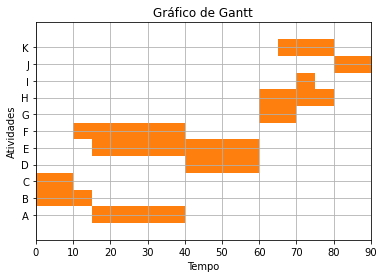

In [ ]:
registro = problema_caminho_critico(atividades, duracoes, matriz_ant)
print(registro)

# Resolvendo com NetworkX

A biblioteca NetworkX conta com as funções [`dag_longest_path()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.dag_longest_path.html) e [`dag_longest_path_length`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.dag_longest_path_length.html#networkx.algorithms.dag.dag_longest_path_length), úteis para encontrar o Caminho Crítico e calcular o seu comprimento, respectivamente. Mas antes, devemos realizar a construção do grafo antes de apliar esta função.

In [ ]:
import networkx as nx

# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
G.add_nodes_from(["Início", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "Fim"])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'duração' para cada aresta
G.add_edges_from([
    ("Início", "A", {'duração': 0}),
    ("Início", "B", {'duração': 0}),
    ("Início", "C", {'duração': 0}),
    ("A", "D", {'duração': 25}),
    ("B", "D", {'duração': 15}),
    ("B", "E", {'duração': 15}),
    ("C", "E", {'duração': 10}),
    ("C", "F", {'duração': 10}),
    ("D", "G", {'duração': 20}),
    ("E", "G", {'duração': 45}),
    ("E", "H", {'duração': 45}),
    ("F", "H", {'duração': 30}),
    ("F", "K", {'duração': 30}),
    ("G", "I", {'duração': 10}),
    ("H", "J", {'duração': 20}),
    ("I", "Fim", {'duração': 5}),
    ("J", "Fim", {'duração': 10}),
    ("K", "J", {'duração': 15})
])

# Constroi a lista de atividades que compõe o Caminho Crítico
cc = nx.dag_longest_path(
    G,
    weight= 'duração'
)
print(f'Caminho Crítico: {cc}')

# Calcula o comprimento do Caminho Crítico
duracao = nx.dag_longest_path_length(
    G,
    weight= 'duração'
)
print(f'Duração do projeto: {duracao}')

Caminho Crítico: ['Início', 'B', 'E', 'H', 'J', 'Fim']
Duração do projeto: 90


## Desenhando o grafo

Para definir a disposição dos nós, foi utilizado a função [`planar_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html), uma vez que se trata de um grafo planar.

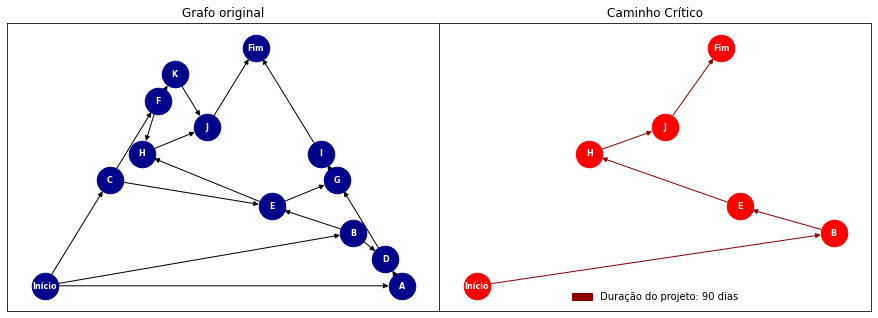

In [ ]:
import matplotlib.pyplot as plt

# Definindo a disposição dos nós do grafo G
posicao = nx.planar_layout(G)

# Desenha o grafo G original
nx.draw_networkx(
    G,                       # Grafo original # Título do Grafo
    ax= plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos= posicao,            # Define o layout dos nós         
    node_color= 'darkblue',  # Define a cor dos nós como azul escuro
    node_size= 700,          # Define o tamanho dos nós
    node_shape= 'o',         # Define o formato dos nós como quadrado
    font_size='8',           # Define o tamanho da fonte.
    font_weight= 'bold',     # Coloca negrito no texto dos nomes dos nós
    font_color= 'white'      # Define a cor do texto dos nomes como branco
    )
plt.title('Grafo original')

# Desenhando o Caminho Crítico
nx.draw_networkx(
    G,                       # Grafo original
    nodelist= cc,            # Exibe apenas os nós do Caminho Crítico
    edgelist= [(cc[i], cc[i+1]) for i in range(len(cc)-1)],  # Exibe apenas as arestas do Caminho Crítico
    ax= plt.axes([1,0,1,1]), # Define o eixo de exibição
    pos= posicao,            # Define o layout dos nós         
    with_labels= True,       # Os nós terão rótulos para exibir os seus nomes
    node_color= 'red',       # Define a cor dos nós como vermelho
    edge_color= 'darkred',   # Define a cor das arestas como vermelho escuro
    node_size= 700,          # Define o tamanho dos nós
    node_shape= 'o',         # Define o formato dos nós como círculo
    font_size='8',           # Define o tamanho da fonte.
    font_weight= 'bold',     # Coloca negrito no texto dos nomes dos nós
    font_color= 'white'      # Define a cor do texto dos nomes como branco
)
plt.title('Caminho Crítico')
plt.legend(
    labels=[f'Duração do projeto: {duracao:.0f} dias'],
    loc='lower center',
    framealpha= 0
)

# Exercício

> As atividades na tabela a seguir descrevem o projeto de construção de uma nova casa.

<center>

|$ \ $|Atividade|Predecessor(es)|Duração (dias)|
|:---:|-----|:---:|:---:|
|A|Limpar terreno|-|1|
|B|Trazer utilitários para o local|-|2|
|C|Excavação|A|1|
|D|Construção da fundação|C|2|
|E|Encanamento externo|B, C|6|
|F|Construção do quadro|D|10|
|G|Fazer a fiação elétrica|F|3|
|H|Colocar assoalho|G|1|
|I|Colocar telhado|F|1|
|J|Encamento interno|E, H|5|
|K|Revestir o tenhado com telhas|I|2|
|L|Isolamento do revestimento externo|F, J|1|
|M|Instalar janelas e portas externas|F|2|
|N|Levantar alvenaria|L, M|4|
|O|Isolamento de paredes e teto|G, J|2|
|P|Cobertura de paredes e teto|O|2|
|Q|Isolamento do tehado|I, P|1|
|R|Finalizar interior|P|7|
|S|Finalizar exterior|I, N|7|
|T|Preparar a paisagem|S|3|

Fonte: TAHA, Hamdy A. <b>Operations Research: An Introduction</b>. 10ª edição. Exercício 6-47, pág. 300.

</center>

(a) Construa a matriz de incidência das atividades

(b) Resolva pelo Pyomo

In [ ]:
import pyomo.environ as pyo



(c) Resolva pelo NetworkX

In [ ]:
import networkx as nx



(d) Plote os grafos, tanto a situação original quanto a solução, com o Matplotlib

In [ ]:
import matplotlib.pyplot as plt

